In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Checking what is inside Measurement object
inspector = inspect(engine)
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1).all()

[('2017-08-23',)]

In [16]:
# Building up a query that it will be used in the Dataframe
session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).filter(Measurement.date >= '2016-08-23').limit(10).all()

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 2.0),
 ('2017-08-23', 11.4),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 12.7),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.5),
 ('2017-08-21', None)]

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names

rain_db = pd.DataFrame (session.query(Measurement.date, Measurement.prcp)\
                        .order_by(Measurement.date.desc())\
                        .filter(Measurement.date >= '2016-08-23'))

rain_db = rain_db.rename(columns={
    'date':'Date',
    'prcp':'Precipitation'
})

,Date,Precipitation
0,2017-08-23,0.0
1,2017-08-23,0.0
2,2017-08-23,2.0
3,2017-08-23,11.4
4,2017-08-22,0.0
...,...,...
2225,2016-08-23,1.3
2226,2016-08-23,NaN
2227,2016-08-23,0.5
2228,2016-08-23,45.5


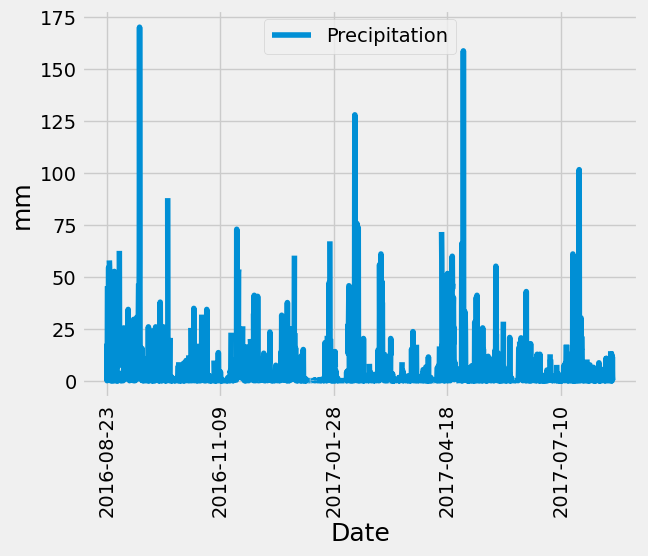

In [ ]:
# Sort the dataframe by date and plot
rain_db = rain_db.sort_values(by='Date', ascending=True)
figure = rain_db.plot(x='Date', y='Precipitation')
figure.set_xlabel('Date', fontsize=18)
figure.set_ylabel('mm', fontsize=18)
figure.tick_params(axis='x', rotation=90)
plt.show()



In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_db.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the highest temperature.
session.query(func.max(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281').order_by(Measurement.tobs).all()

[(29.4,)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest temperature.
session.query(func.min(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281').order_by(Measurement.tobs).all()

[(12.2,)]

In [ ]:
# Using the most active station id from the previous query, calculate average temperature.
session.query(func.avg(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281').order_by(Measurement.tobs).all()

[(22.03582251082252,)]

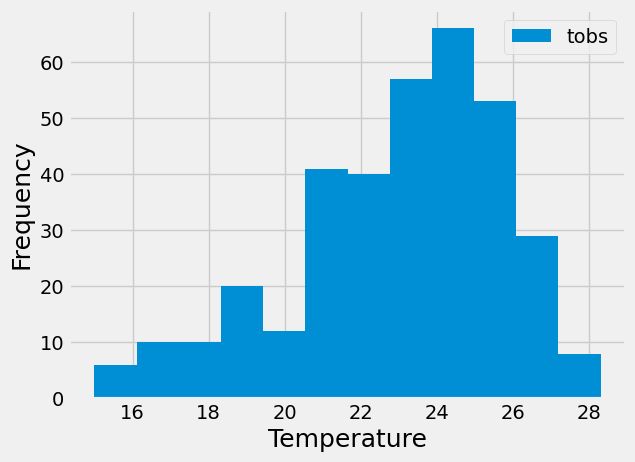

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_db = pd.DataFrame(session.query(Measurement.station, Measurement.tobs)\
                       .filter(Measurement.station == 'USC00519281')\
                        .filter(Measurement.date >= '2016-08-23').all())
figure1 = temp_db.plot(kind='hist', bins=12)
figure1.set_xlabel('Temperature', fontsize=18)
figure1.set_ylabel('Frequency', fontsize=18)
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()